In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant
from matplotlib.pyplot import figure


In [2]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)




#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [3]:
# Splitting the dataset set I form the main data
data1 = df.loc[df['dataset'] == "I"]
data1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### Scatterplot 

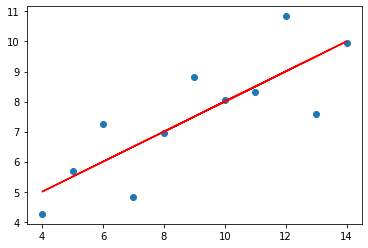

In [4]:
# Reshaping the values
X = data1.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data1.iloc[:, 2].values.reshape(-1, 1)

# Linear Regression
model = LinearRegression()
model.fit(X,Y)

# Predicting

y_pred = model.predict(X)

# Scatterplit

plt.scatter(X,Y)
plt.plot(X, y_pred, color = 'red')
plt.show()

### Summary Table

In [5]:
x = sm.add_constant(X)
model = sm.OLS(Y,x)
result = model.fit()
result.summary()

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 03 May 2021   Prob (F-statistic):            0.00217
Time:                        21:33:33   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Model

y = 0.5001x + 3.0001


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

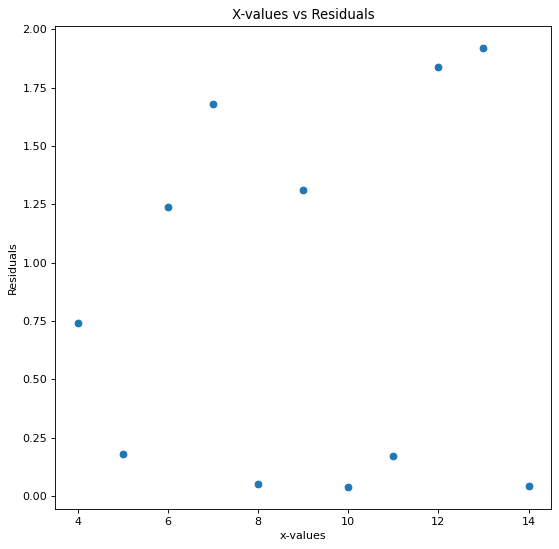

In [6]:
# Calculating the residuals (Acutal - Predicted)
residuals = abs(Y-y_pred)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(X,residuals)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()



#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

#### Assumptions of Linear Regression

1) Linearity : Linear relationship between the independent variable and dependent variable

2) Independence: The residuals are independent.

3) Homoscedaticity: The residuals have constant variance

4) Normality : The residuals are normally distributed



1.From the plot in part A, we visually see there is a linear relationship between the two variables. If it looks like the points in the plot could fall along a straight line, then there exists some type of linear relationship between the two variables and this assumption is met.

2.From the plot in part B, "residuals with fitted values" there is no  pattern among consecutive residuals.

3.we can clearly see homoscedaticity in the plot in part B,the residuals become much more spread out as the fitted values get larger. This “cone” shape is a classic sign of heteroscedasticity.

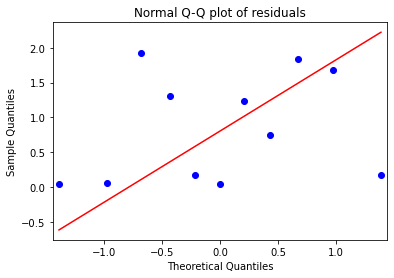

In [7]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residuals,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

4.The Q-Q plot below shows the residuals clearly depart from a straight diagonal line, which indicates that they do not follow  normal distribution.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Since the data violates the homoscedaticity and normality assumptions, lets transform X to by taking log.

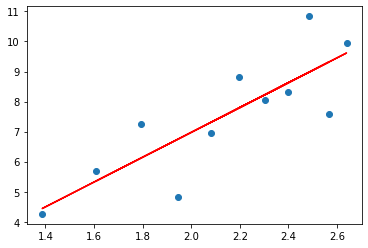

In [8]:
# Linear Regression
logx = np.log(X)

model1 = LinearRegression()
model1.fit(logx,Y)

# Predicting

y_pred1 = model1.predict(logx)

# Scatterplit

plt.scatter(logx,Y)
plt.plot(logx, y_pred1, color = 'red')
plt.show()

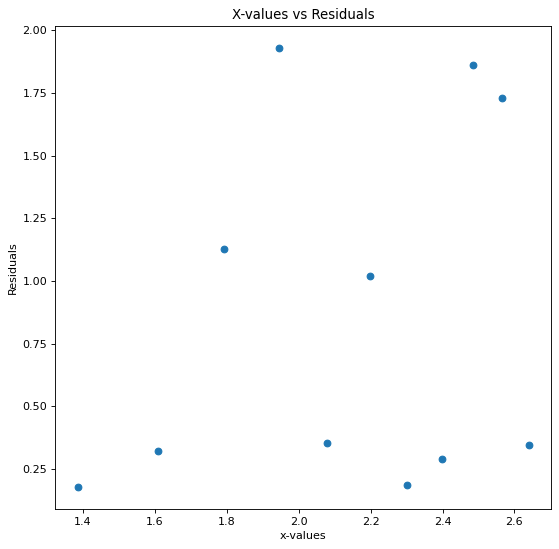

In [9]:
# Calculating the residuals (Acutal - Predicted)
residuals1 = abs(Y-y_pred1)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(logx,residuals1)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()

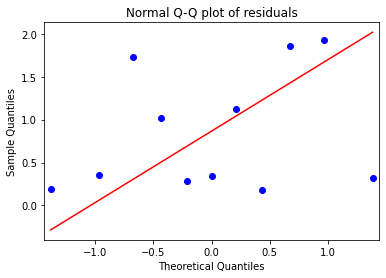

In [10]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residuals1,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

We find here, logx linear regression model doesnt fit as well as doesnt improve normality, we now try building model with square of x.

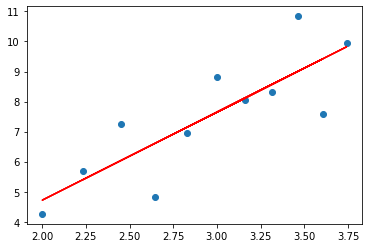

In [11]:
# Linear Regression
sqx = np.sqrt(X)

model2 = LinearRegression()
model2.fit(sqx,Y)

# Predicting

y_pred2 = model2.predict(sqx)

# Scatterplit

plt.scatter(sqx,Y)
plt.plot(sqx, y_pred2, color = 'red')
plt.show()

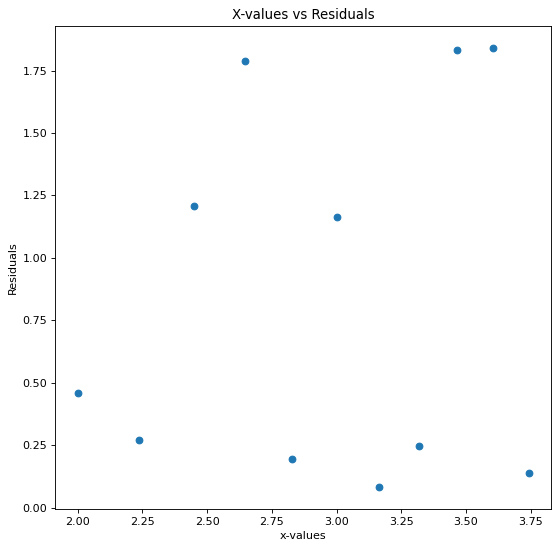

In [12]:
# Calculating the residuals (Acutal - Predicted)
residuals2 = abs(Y-y_pred2)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(sqx,residuals2)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()

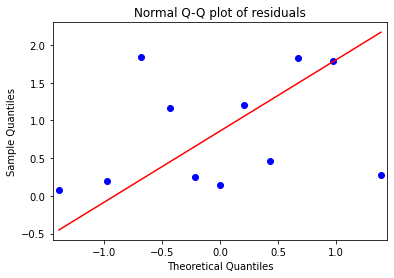

In [13]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residuals2,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

the residual plot in "model2" doesnt show any pattern as in the first model built ie "model".
Q-Q plot of "model2" also shows a observation is fitted to the line, hence its improved comparing to "model"and"model1".
so we are fixing with the model2 as improved model and the corresponding plots are plotted along with Q-Q plot.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The "model" built had violations on the assumptions in the linear regression, so we have tried modifying the model by taking log and square to the dependent variable x, by trying out these two tranformation, square of x ie "model2" adjusts to remove homoscedaticity and normality as seen in the plots.Here taking square of x, improves the model as well fits the assumptions.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [14]:
# Splitting the dataset set II form the main data
data2 = df.loc[df['dataset'] == "II"]
data2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


## Scatterplot

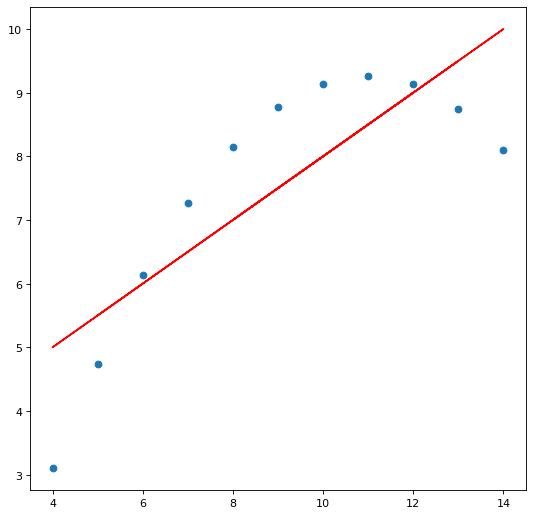

In [15]:
# Reshaping the values
X2 = data2.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y2 = data2.iloc[:, 2].values.reshape(-1, 1)

# Linear Regression
modelB = LinearRegression()
modelB.fit(X2,Y2)

# Predicting

y_predB = modelB.predict(X2)

# Scatterplit
figure(figsize=(8, 8), dpi=80)
plt.scatter(X2,Y2)
plt.plot(X2, y_predB, color = 'red')
plt.show()

## Summary Table

In [16]:
x2 = sm.add_constant(X2)
modelB = sm.OLS(Y2,x2)
result = modelB.fit()
result.summary()

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 03 May 2021   Prob (F-statistic):            0.00218
Time:                        21:33:35   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.026       0.455       5.547
x1             0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Model

y - 0.50x + 3.0009


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

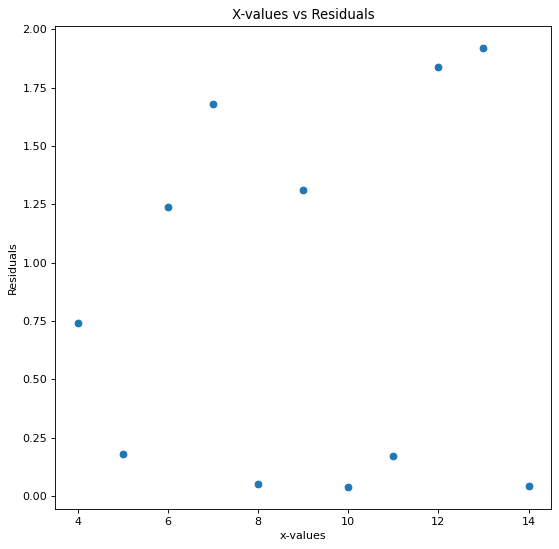

In [17]:
# Calculating the residuals (Acutal - Predicted)
residualsB = abs(Y2-y_predB)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(X2,residuals)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()



#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

## Assumptions of Linear Regression
1) Linearity : Linear relationship between the independent variable and dependent variable

2) Independence: The residuals are independent.

3) Homoscedaticity: The residuals have constant variance

4) Normality : The residuals are normally distributed

1.From the plot A, its clearly visible that the features are not linearly related,so we have to apply a nonlinear transformation to the independent and/or dependent variable.

2.From the plot in part B, "residuals with fitted values" there is no pattern among consecutive residuals hence residuals are independent.

3.As visualized from plot from part B, there is no pattern in the residual even though it is spread out thus follows homoscedaticity.

Nomality check:


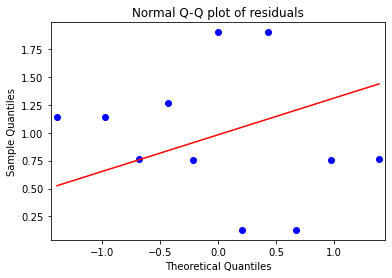

In [18]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residualsB,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

4.There is a point going through the diagonal, yet we will see how the normality changes once we do transformation for linear fit.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Since it violates the first assumption that the the independent variable and dependent variable are linearly related, we are now going to do transformation on x. since the points form curve as seen in part A plot, we are going to take reciprocal of X and see how it fits.

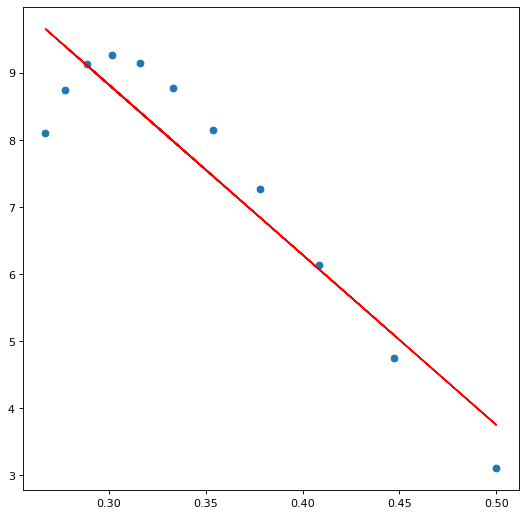

In [19]:
# Reshaping the values
X2 = data2.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y2 = data2.iloc[:, 2].values.reshape(-1, 1)

xb =np.sqrt(1/(X2))
yb = Y2

# Linear Regression
modelB = LinearRegression()
modelB.fit(xb,yb)

# Predicting

y_predb = modelB.predict(xb)

# Scatterplit
figure(figsize=(8, 8), dpi=80)
plt.scatter(xb,yb)
plt.plot(xb, y_predb, color = 'red')
plt.show()

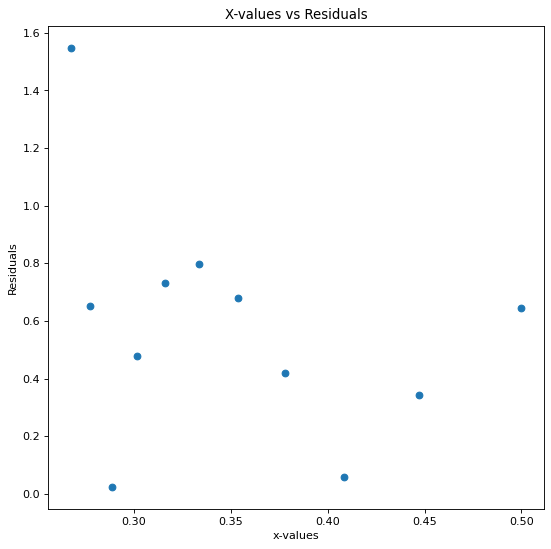

In [20]:
# Calculating the residuals (Acutal - Predicted)
residualb = abs(yb-y_predb)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(xb,residualb)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()

There is no pattern or shape in there plot of residual as observed from the plot above, so the homoscedaticity is maintained.

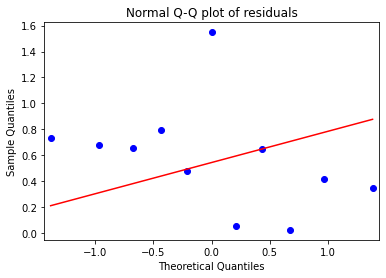

In [21]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residualb,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

The inference here is after trying out different transformation of x data with log,sqrt,exp,reciprocals,and combination of these, i came up with the "square of (inverse of x)" to be best transformation since it forms linear relationship as well as the normality is reached.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The data forms a poly-curve, no observation is linearly related either positively or negatively. we have to do some transformation as above to get the linear realtionship to the data. Further other assumptions are also met after the transformation, as seen in the Q-Q plot as well as the residual plot.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [22]:
# Splitting the dataset set II form the main data
data3 = df.loc[df['dataset'] == "III"]
data3

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


## Scatterplot

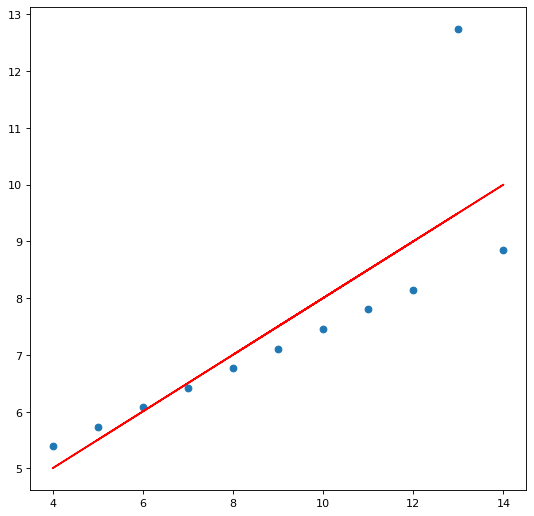

In [23]:
# Reshaping the values
Xc = data3.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Yc = data3.iloc[:, 2].values.reshape(-1, 1)

# Linear Regression
modelc = LinearRegression()
modelc.fit(Xc,Yc)

# Predicting

y_predc = modelc.predict(Xc)

# Scatterplit
figure(figsize=(8, 8), dpi=80)
plt.scatter(Xc,Yc)
plt.plot(Xc, y_predc, color = 'red')
plt.show()

## Summary Table

In [24]:
xc = sm.add_constant(Xc)
modelc = sm.OLS(Yc,xc)
result = modelc.fit()
result.summary()

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 03 May 2021   Prob (F-statistic):            0.00218
Time:                        21:33:36   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.026       0.459       5.546
x1             0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Model

y = 0.4997x + 3.0025


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

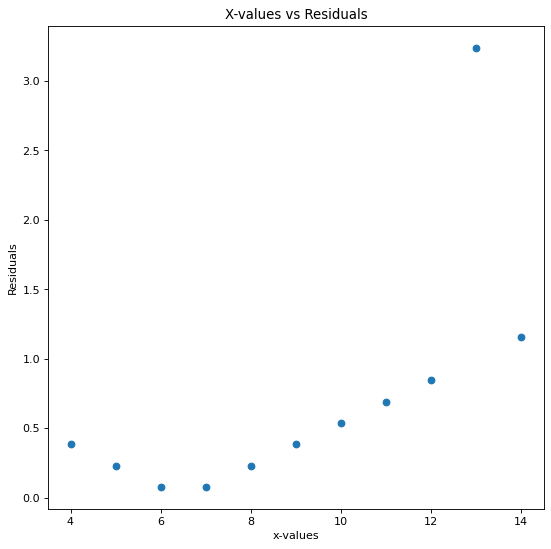

In [25]:
# Calculating the residuals (Acutal - Predicted)
residualc = abs(Yc-y_predc)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(Xc,residualc)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()



#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

## Assumptions of Linear Regression
1) Linearity : Linear relationship between the independent variable and dependent variable

2) Independence: The residuals are independent.

3) Homoscedaticity: The residuals have constant variance

4) Normality : The residuals are normally distributed

1.The plot in the part A clearly shows linearly relationship between the features even though the fit is not perfectly fit and we also see outliers.

2.In the plot of part B, the points  seem randomly scattered, and it doesnt  appear that there is a relationship.Hence it follows independency.

3.From the residual plot, it is clearly visible, residuals donot have any pattern hence no homoscedaticity.

Normality check:

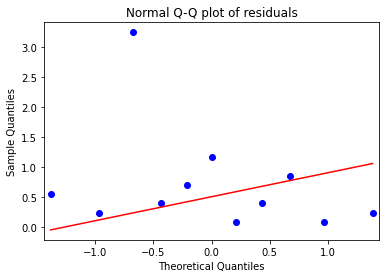

In [26]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residualc,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

4. The residuals fall in line at two places and somewhat normally distributed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

we are doing outlier treatment to make the model to fit linearly and show good linearity.since the data is so small, we can see the outlier values in the dataframe ie 12.74 and we are removing it.

In [27]:
#removing outliers
df3 = df.loc[df['dataset'] == "III"]
df3t = df3.drop(df3[df3['y'] == 12.74].index)
df3t

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42
32,III,5.0,5.73


now we will do some transformation to the x and fit the model

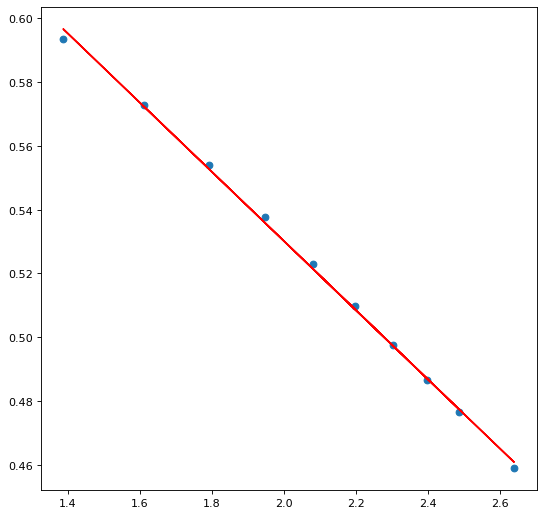

In [28]:
# Reshaping the values
xct = df3t.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
yct = df3t.iloc[:, 2].values.reshape(-1, 1)

Xct =  np.log(xct) 
Yct =  1/np.log(yct)

# Linear Regression
modelct = LinearRegression()
modelct.fit(Xct,Yct)

# Predicting

y_predct = modelct.predict(Xct)

# Scatterplit
figure(figsize=(8, 8), dpi=80)
plt.scatter(Xct,Yct)
plt.plot(Xct, y_predct, color = 'red')
plt.show()

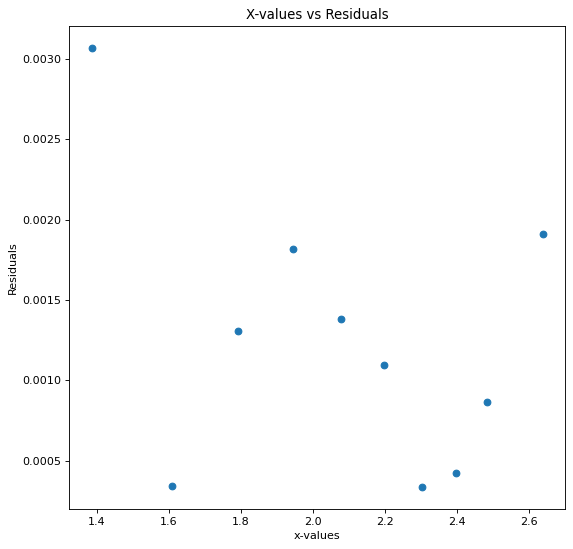

In [29]:
# Calculating the residuals (Acutal - Predicted)
residualct = abs(Yct-y_predct)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(Xct,residualct)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()


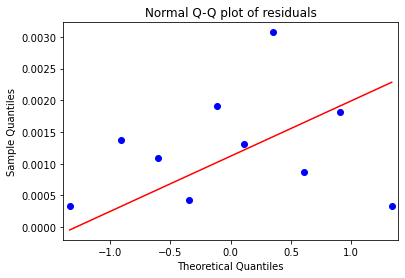

In [30]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residualct,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

Here in this new model "modelct" there is significance change in fitting the linear line when we do transformations to  x and y  by log and removed outliers yet slight improve in normality of the residuals.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

from the first "modelc" and "modelct", there is only one adjustment made, that is outlier removal.even though we tried various transformations to the model's dependent and independent variable, it doesnt show any significance effects.thus we are holding to "modelct".

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [31]:
# Splitting the dataset set IIV form the main data
data4 = df.loc[df['dataset'] == "IV"]
data4

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91



#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

# Scatterplot

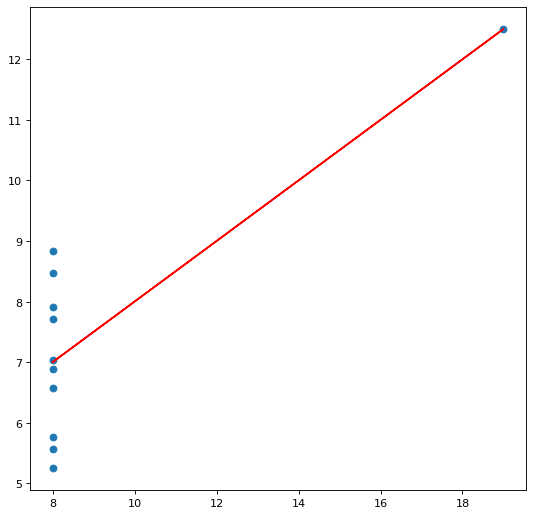

In [32]:
# Reshaping the values
Xd = data4.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Yd = data4.iloc[:, 2].values.reshape(-1, 1)

# Linear Regression
modeld = LinearRegression()
modeld.fit(Xd,Yd)

# Predicting

y_predd = modeld.predict(Xd)

# Scatterplit
figure(figsize=(8, 8), dpi=80)
plt.scatter(Xd,Yd)
plt.plot(Xd, y_predd, color = 'red')
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

# Summary table

In [33]:
xd = sm.add_constant(Xd)
modeld = sm.OLS(Yd,xd)
result = modeld.fit()
result.summary()

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Mon, 03 May 2021   Prob (F-statistic):            0.00216
Time:                        21:33:37   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.026       0.459       5.544
x1             0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model

y = 0.4999x + 3.0017


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

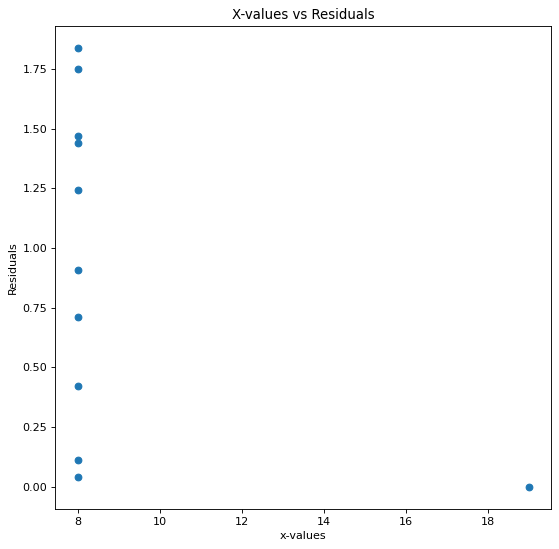

In [34]:
# Calculating the residuals (Acutal - Predicted)
residuald = abs(Yd-y_predd)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(Xd,residuald)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

#### Assumptions of Linear Regression

1) Linearity : Linear relationship between the independent variable and dependent variable

2) Independence: The residuals are independent.

3) Homoscedaticity: The residuals have constant variance

4) Normality : The residuals are normally distributed

1.The plot in the part A clearly shows no linearly relationship between the features and  the fit is not perfectly fit and we also see outliers.

2.In the plot of part B, the points seem scattered in a line and it does  appear that there is a relationship.Hence it doesnt follows independency.

3.From the residual plot, it is clearly visible, residuals have any pattern hence there is homoscedaticity.

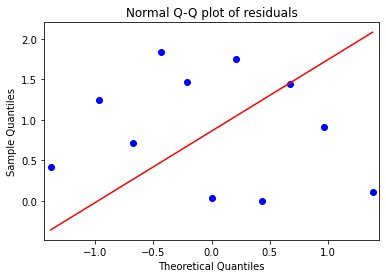

In [35]:
#we will plot Q-Q plot as a check to normality
import statsmodels.api as sm
qqplot=sm.qqplot(residuald,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

4. The residuals fall in line at a places and likely normally distributed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

we will consider doing some transformation to either or both x and y.we will also remove the outlier in the data frame.lets check how this affects the model fit.

It is clearly seen from the dataframe itself, the outlier lies at x = 19.0 since the data is so small we could find it easily.
lets remove the outlier.

In [36]:
df4 = df.loc[df['dataset'] == "IV"]
df4t = df4.drop(df4[df4['x'] == 19.0].index)
df4t

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


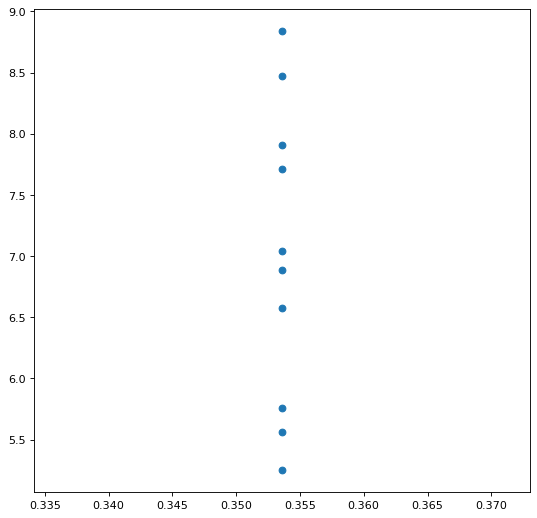

In [37]:
# Reshaping the values
xd = df4t.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
yd = df4t.iloc[:, 2].values.reshape(-1, 1)

Xdt = 1/np.sqrt(xd) 
Ydt = yd


# Linear Regression
modeldt = LinearRegression()
modeldt.fit(Xdt,Ydt)

# Predicting

y_predt = modeldt.predict(Xdt)

# Scatterplit
figure(figsize=(8, 8), dpi=80)
plt.scatter(Xdt,Ydt)
plt.plot(Xdt, y_predt, color = 'red')
plt.show()

Here in this data set, the values of x is constant and model shows no effects to the transformations,yet we have removed the outliers. the below residual plot also explains the same, ie there is no effect.

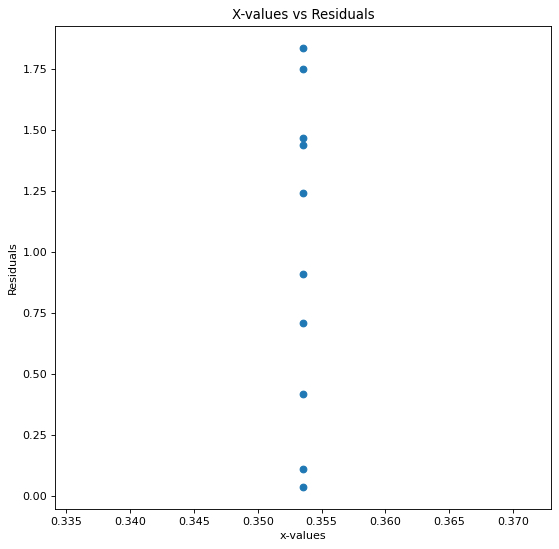

In [38]:
# Calculating the residuals (Acutal - Predicted)
residualt = abs(Ydt-y_predt)

#Scatterplot

figure(figsize=(8, 8), dpi=80)
plt.scatter(Xdt,residualt)
plt.title("X-values vs Residuals")
plt.xlabel("x-values")
plt.ylabel("Residuals")
plt.show()



#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

As the data set contains constant values in X, it is clear that no transformation or outlier treatment can adjust the model and couldnt be fit linealy, linear regression cannot be applied to this dataset.